In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [10]:
fraudulent_data = pd.read_csv("/Users/hanniepham/Online Fraud Analytics/Fraud Analytics Dataset - npci_data.csv")

In [11]:
fraudulent_data.head()

,txn_id,dt_txn_comp,txn_comp_time,txn_type,txn_subtype,initiating_channel_id,txn_status,error_code,payer_psp,payee_psp,...,custref_transaction_ref,cred_type,cred_subtype,payer_app_id,payee_app_id,initiation_mode,dt_time_txn_compl,time_of_day,@dropdown,@dropdown.1
0,436,2023-08-11,12:00:00 AM,Refund,Product Refund,4,Successful,NaN,Amazon Pay,BharatPe (for UPI and QR code payments),...,Reference 324,Debit Card,Prepaid Debit Card,BHIM Union Bank UPI App,AmazonPay,18,2023-08-11 0:00,Night,NaN,NaN
1,665,2021-10-17,12:00:00 AM,Payment,Peer-to-Peer (P2P),16,Successful,NaN,ICICI iMobile,Square (for international transactions),...,Reference 550,Overdraft,Business Overdraft,ESAF,BHIM Union Bank UPI App,18,2021-10-17 0:00,Night,NaN,NaN
2,726,2019-11-16,12:00:00 AM,Withdrawal,ATM Withdrawal,3,Successful,NaN,Axis Pay,PhonePe for Merchants,...,Reference 611,Auto Loan,Used Car Loan,ICICI iMobile,BHIM Indus Pay,16,2019-11-16 0:00,Night,NaN,NaN
3,842,2023-09-05,12:00:00 AM,Transfer,Inter-bank Transfer,0,Successful,NaN,MobiKwik,ICICI Merchant Services,...,Reference 729,Overdraft,Personal Overdraft,BHIM UPI APP,JusPay Technologies,2,2023-09-05 0:00,Night,NaN,NaN
4,2202,2021-09-18,12:00:00 AM,Fee,Account Maintenance Fee,1,Successful,NaN,MasterCard,BharatPe (for UPI and QR code payments),...,Reference 2068,Personal Loan,Unsecured Personal Loan,PREPAIDICICI,Cred,1,2021-09-18 0:00,Night,NaN,NaN


In [9]:
fraudulent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55671 entries, 0 to 55670
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   txn_id                   55671 non-null  int64  
 1   dt_txn_comp              55671 non-null  object 
 2   txn_comp_time            55671 non-null  object 
 3   txn_type                 55671 non-null  object 
 4   txn_subtype              55671 non-null  object 
 5   initiating_channel_id    55671 non-null  int64  
 6   txn_status               55671 non-null  object 
 7   error_code               4903 non-null   object 
 8   payer_psp                55671 non-null  object 
 9   payee_psp                55671 non-null  object 
 10  remitter_bank            55671 non-null  object 
 11  beneficiary_bank         55671 non-null  object 
 12  payer_handle             55671 non-null  object 
 13  payer_app                55671 non-null  object 
 14  payee_handle          

In [32]:
fraudulent_data.isnull()

,txn_id,dt_txn_comp,txn_comp_time,txn_type,txn_subtype,initiating_channel_id,txn_status,error_code,payer_psp,payee_psp,...,cred_type,cred_subtype,payer_app_id,payee_app_id,initiation_mode,dt_time_txn_compl,time_of_day,@dropdown,@dropdown.1,month
0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55666,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
55667,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False
55668,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False
55669,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False


### 1. How have fraud incidents fluctuated over the years?


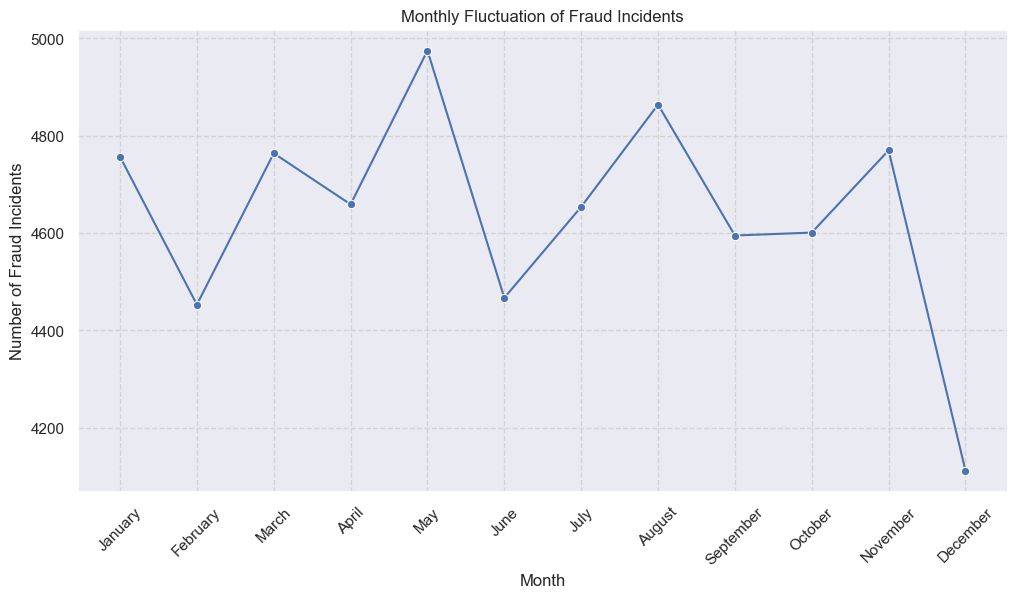

In [19]:
# Convert 'dt_txn_comp' to datetime format for data manipulation
fraudulent_data['dt_txn_comp'] = pd.to_datetime(fraudulent_data['dt_txn_comp'])

# Extract month from 'dt_txn_comp' for monthly fraud analysis
fraudulent_data['month'] = fraudulent_data['dt_txn_comp'].dt.month

# Group by month and count fraud incidents
fraud_counts = fraudulent_data.groupby('month').size().reset_index(name = 'fraud_count')

# Set seaborn plot aesthetics
sns.set(style = "darkgrid", color_codes = True,
        rc = {"grid.linestyle": "--", "grid.color": "lightgray"})

# Initialize figure with size for clarity
plt.figure(figsize = (12, 6))

# Create line plot for monthly fraud counts
sns.lineplot(x = 'month', y = 'fraud_count', data = fraud_counts, marker = 'o')

# Title and axes labels
plt.title('Monthly Fluctuation of Fraud Incidents')
plt.xlabel('Month')
plt.ylabel('Number of Fraud Incidents')

# Set x-ticks to month names, rotated for readability
plt.xticks(range(1, 13), calendar.month_name[1:13], rotation = 45)

# Enable grid for readability
plt.grid(True)

# Display plot
plt.show()


Metrics : Time Period, Volume Metric

Actionable Insight : 

- The graph shows a clear pattern of fraud incidents with constant spikes in May. This suggests the need for increased vigilance and preventive measures during these months. 
- The sharp decline in February and June may indicate effective countermeasures, which could be replicated to mitigate future spikes.

### 2. Which types of Credit fraud are causing the most financial damage?


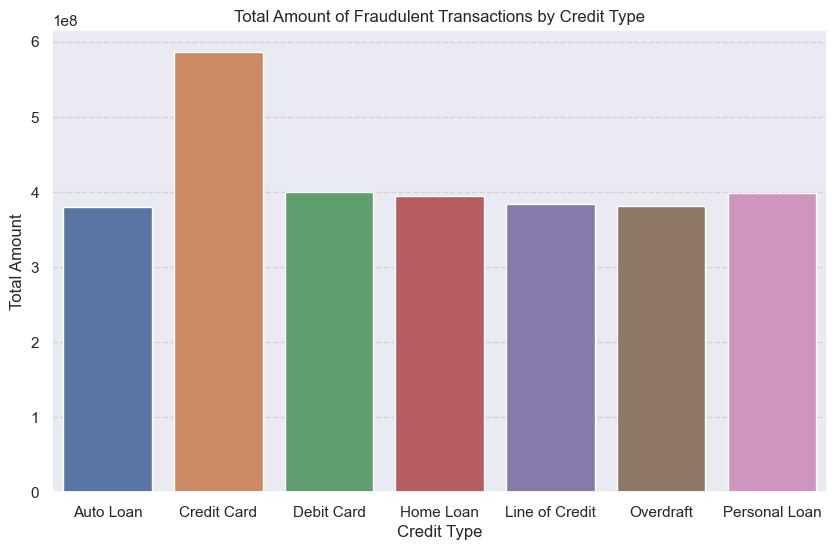

In [21]:
# Sum fraudulent amounts by credit type
fraudulent_amount_by_credit_type = fraudulent_data.groupby('cred_type')['payee_settlement_amount'].sum().reset_index()

#Inintialize plot with specified figure size
plt.figure(figsize = (10, 6))

#Create bar plot for fraudulent amounts by credit type
sns.barplot(x = 'cred_type', y = 'payee_settlement_amount', data = fraudulent_amount_by_credit_type)

# Set plot title and labels for clarity
plt.title('Total Amount of Fraudulent Transactions by Credit Type')
plt.xlabel('Credit Type')
plt.ylabel('Total Amount')

# Display the plot
plt.show()

Metrics : Credit Type, Total Amount of Fraudulent Transactions

Actionable Insight : 

- Credit card fraud represents the highest total amounts, indicating these areas are particularly high-risk.
- Given the high amount of fraud in credit cards, there could be an opportunity to educate customers on safe credit card practices.


### 3. Are there certain regions more prone to fraud incidents than others?


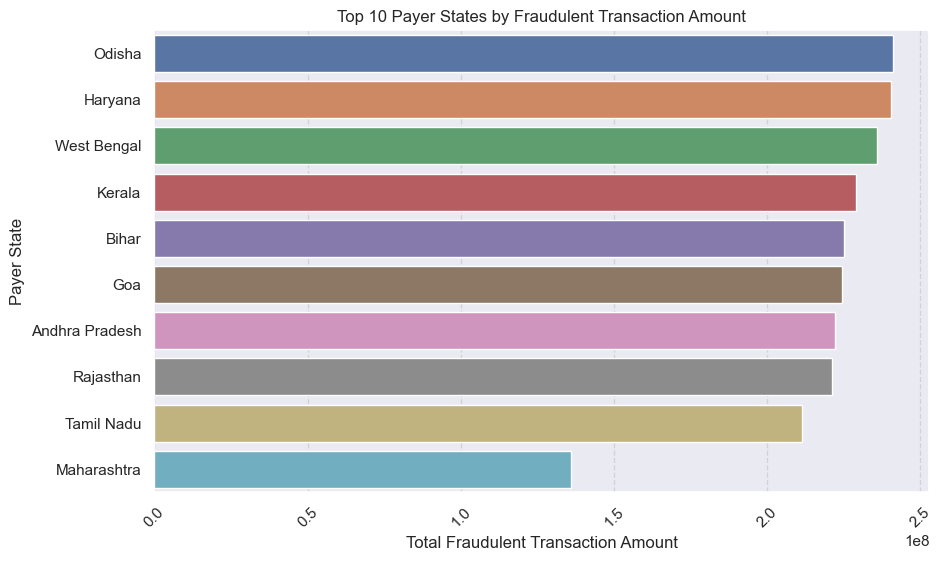

In [22]:
# Group data by 'payer_state', sum 'payee_settlement_amount', and get top 10 
top_payer_states_amount = fraudulent_data.groupby('payer_state')['payee_settlement_amount'].sum().nlargest(10).reset_index()

# Set the figure size for the plot
plt.figure(figsize = (10, 6))

# Create a horizontal bar plot of the top 10 states
sns.barplot(x = 'payee_settlement_amount', y = 'payer_state', data = top_payer_states_amount, orient = 'h')

# Set the plot title and axis labels
plt.title('Top 10 Payer States by Fraudulent Transaction Amount')
plt.xlabel('Total Fraudulent Transaction Amount')
plt.ylabel('Payer State')

# Rotate x-ticks for better readability
plt.xticks(rotation = 45)

# Display the plot
plt.show()

Metrics :Total Fraudulent Transaction Amount, Payer State

Actionable Insight : 

- States with higher fraudulent transaction amounts like Maharashtra, Tamil Nadu, and Rajasthan may benefit from state-specific fraud prevention initiatives.
- Maharashtra, showing the highest total fraudulent transaction amount, should be subjected to more rigorous monitoring and investigative activities.

### 4. What is the financial impact of fraud across different regions?


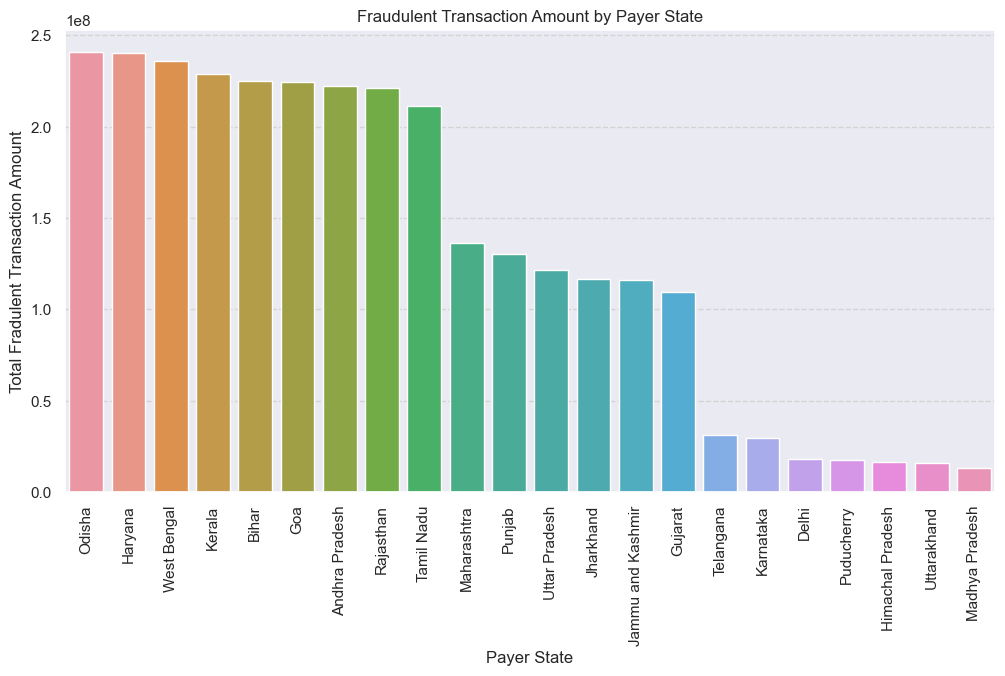

In [30]:
# Group the fraudulent data by 'payer_state' and sum up 'payee_settlement_amount'
fraudulent_amount_by_payer_state = fraudulent_data.groupby('payer_state')['payee_settlement_amount'].sum().reset_index()

# Sort the resulting DataFrame by 'payee_settlement_amount' in descending order 
fraudulent_amount_by_payer_state = fraudulent_amount_by_payer_state.sort_values(by = 'payee_settlement_amount', ascending = False)

# Initialize a figure with specified size for the plot
plt.figure(figsize = (12, 6))

# Create a bar plot showing total fradulent transaction amount by payer state
sns.barplot(x = 'payer_state', y = 'payee_settlement_amount', data = fraudulent_amount_by_payer_state)

# Set the title of the plot and labels for the x and y axes
plt.title('Fraudulent Transaction Amount by Payer State')
plt.xlabel('Payer State')
plt.ylabel('Total Fradulent Transaction Amount')

# Rotate the x-axis labels (states) for letter readability
plt.xticks(rotation = 90)

# Display the plot
plt.show()

Metrics : Total Fraudulent Transaction Amount, Payer State

Actionable Insight : 

- Odisha, Haryana, West Bengal and  are the top states for fraudulent transactions, indicating the need for targeted anti-fraud initiatives in these regions.


### 5. How does user behavior vary by time of day in terms of number of fraudulent transactions and fraudulent transaction amount?


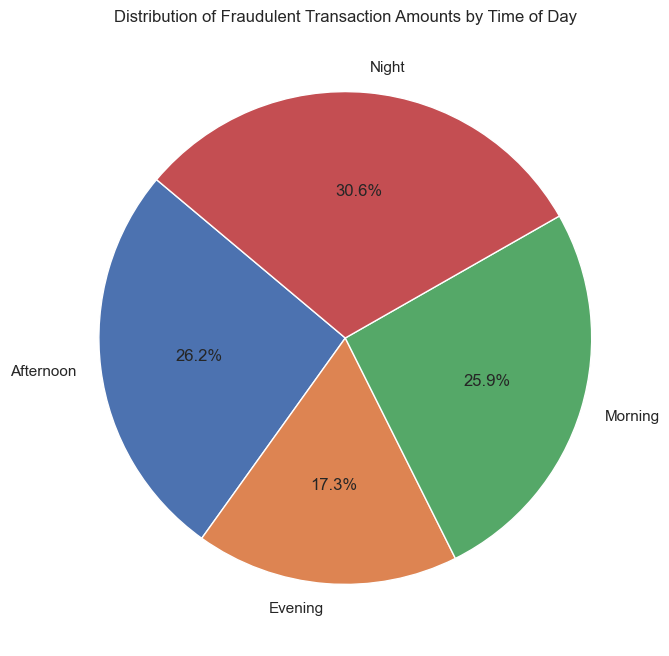

In [31]:
# Aggregate fraudulent amount by time of day
fraudulent_amount_by_time = fraudulent_data.groupby('time_of_day')['payee_settlement_amount'].sum().reset_index()

# Initialize pie chảt figure with specified size
plt.figure(figsize = (8, 8))

# Create pie chart for fraudulent transaction amounts by time of day 
plt.pie(fraudulent_amount_by_time['payee_settlement_amount'], labels = fraudulent_amount_by_time['time_of_day'], autopct = '%1.1f%%', startangle = 140)

# Title for the pie chart
plt.title('Distribution of Fraudulent Transaction Amounts by Time of Day')

# Display the pie chart
plt.show()

Metrics : Time of Day, Percentage of Total Fraudulent Transaction Amount

Actionable Insight : 

- The largest share of fraudulent transactions occurs at night (31.0%), suggesting that fraudsters may prefer times when oversight may be lower and victims less vigilant.
‍